# Tutorial2: scDREAMER unsupervised integration of Human Immune dataset

Clone scDREAMER Github repository

In [ ]:
# Restart runtime after every run.
!git clone https://github.com/Zafar-Lab/scDREAMER.git
%cd scDREAMER/
!ls

fatal: destination path 'scDREAMER' already exists and is not an empty directory.
/content/scDREAMER
architecture.png  LICENSE    scDREAMER_runs.ipynb
docs		  README.md  scDREAMER_SUP
Environments	  scDREAMER  scDREAMER_Sup_runs.ipynb


Mounting Google drive for accessing the input data




In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing required libraries for running scDREAMER

In [ ]:
# Restart the run post installation of below libraries
!pip install -U scipy==1.10.1
!pip install scanpy==1.9.3

architecture.png  LICENSE    scDREAMER_runs.ipynb
docs		  README.md  scDREAMER_SUP
Environments	  scDREAMER  scDREAMER_Sup_runs.ipynb


Specify path to the input file

In [ ]:
# Please specify the data path for the datasets
data_path = "/content/drive/MyDrive/Colab Notebooks/Project/scDREAMER/Immune/Immune_Human/Immune_ALL_human.h5ad"

Importing Libraries

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import os
import random

import numpy as np
import tensorflow as tf2
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()


np.random.seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Specify name of the datset to run
name = "Immune_Human"

data_path = {
    "Immune_Human": data_path,
}

batch_key_dict = {
    "Immune_Human": "batch",
    "Lung": "batch",
    "Pancreas": "tech",
    "Human_Mouse": "batch",
    "Human_Retina": "Batch",
    "Healthy_Heart": "sampleID",
}
cell_type_key_dict = {
    "Immune_Human": "final_annotation",
    "Lung": "cell_type",
    "Pancreas": "celltype",
    "Human_Mouse": "celltype",
    "Human_Retina": "Subcluster",
    "Healthy_Heart": "celltype",
}

# Leaning rate to use for small data vs large input data
learning_rate = {
    "Immune_Human": {"lr_ae": 0.0002, "lr_dis": 0.0007},  # Small Datasets
    "Human_Mouse": {"lr_ae": 0.0001, "lr_dis": 0.00001},
}  # Big Datasets >= 0.5 million cells

Reading data


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.


encoder input shape  Tensor("concat:0", shape=(?, 2010), dtype=float32)
decoder input shape  Tensor("concat_2:0", shape=(?, 20), dtype=float32)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



KL gaussian z Tensor("mul_10:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_9:0", shape=(?,), dtype=float32)
scDREAMER on DataSet /content/drive/MyDrive/Colab Notebooks/Project/scDREAMER/Immune/Immune_Human/Immune_ALL_human.h5ad ... 
Epoch : [0] ,  a_loss = 517.4711
Epoch : [10] ,  a_loss = 404.9067
Epoch : [20] ,  a_loss = 387.9474
Epoch : [30] ,  a_loss = 377.6891
Epoch : [40] ,  a_loss = 370.3075
Epoch : [50] ,  a_loss = 364.6601
Epoch : [60] ,  a_loss = 360.2006
Epoch : [70] ,  a_loss = 356.6030
Epoch : [80] ,  a_loss = 353.6540
Epoch : [90] ,  a_loss = 351.2103
Epoch : [100] ,  a_loss = 349.1573
Epoch : [110] ,  a_loss = 347.4158
Epoch : [120] ,  a_loss = 345.9245
Epoch : [130] ,  a_loss = 344.6351
Epoch : [140] ,  a_loss = 343.5103
Epoch : [150] ,  a_loss = 342.5197
Epoch : [160] ,  a_loss = 341.6437
Epoch : [170] ,  a_loss = 340.8624
Epoch : [180] ,  a_loss = 340.1621
Epoch : [190] ,  a_loss = 339.5314
Epoch : [200] ,  a_loss = 338.9593
Epoch : [210] ,  a_loss = 338.43

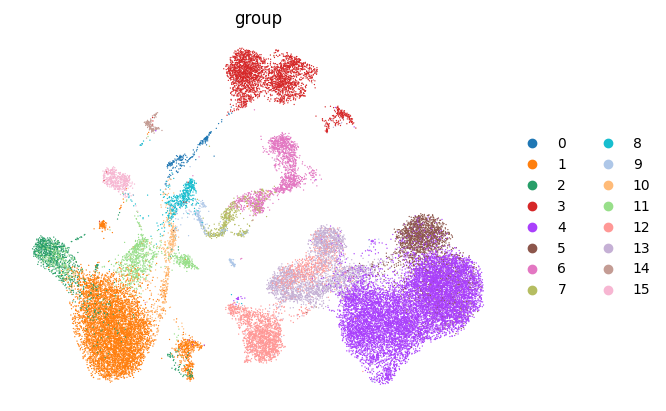

None


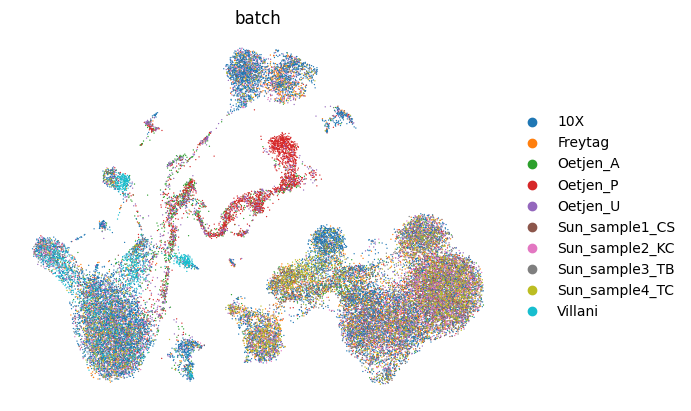

None
Computing NMI ...
Done !
NMI = 0.7174472826390661


In [ ]:
import scDREAMER.model as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config=run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch=250,
        dataset_name=data_path[name],
        batch=batch_key_dict[name],
        cell_type=cell_type_key_dict[name],
        name=name,
        lr_ae=learning_rate[name]["lr_ae"],
        lr_dis=learning_rate[name]["lr_dis"],
    )

    dreamer.train_cluster()